<a href="https://colab.research.google.com/github/SS-yong/SS-yong/blob/main/FL_UCI_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/FL')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/FL'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'
PROJECT_NAME = 'FL_UCI'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', PROJECT_NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH + fig_id + "." + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [4]:
train_df.subject.unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [5]:
test_df.subject.unique()

array([ 2,  4,  9, 10, 12, 13, 18, 20, 24])

In [6]:
df = pd.concat([train_df, test_df]).reset_index(drop=True)
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
X = df.iloc[:,:-1]
y = df['Activity']

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_encoded = le.fit_transform(y)

In [9]:
label_encoded

array([2, 2, 2, ..., 5, 5, 5])

In [10]:
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, label_encoded, test_size=0.3, stratify=df.subject, random_state=42)

In [12]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
9841,0.275173,-0.016820,-0.102908,-0.996901,-0.990268,-0.988463,-0.997120,-0.991277,-0.988446,-0.942161,...,-0.676178,-0.942493,-0.192539,-0.831704,-0.498353,-0.163601,0.620662,-0.849058,-0.143008,20
4123,0.304211,0.013698,-0.127600,-0.346184,0.193883,-0.139228,-0.383331,0.263254,-0.114249,-0.062767,...,0.589898,0.427756,-0.020028,0.778852,-0.563336,0.675156,-0.561511,0.348793,0.187306,21
4301,0.244149,-0.021648,-0.095978,-0.964200,-0.984287,-0.975308,-0.965277,-0.982964,-0.973690,-0.915226,...,-0.504768,-0.809096,-0.031645,-0.071265,-0.369617,0.290705,0.412515,-0.363074,-0.626242,21
8617,0.277113,0.004714,-0.135541,-0.957324,-0.928560,-0.928255,-0.962333,-0.928796,-0.929220,-0.855663,...,-0.322162,-0.708126,0.045264,-0.500213,0.215021,-0.215651,0.501519,-0.325998,-0.681809,12
10271,0.253323,-0.024865,-0.170146,-0.307713,-0.188579,-0.141310,-0.377426,-0.226048,-0.220538,0.092017,...,-0.141846,-0.564142,0.004509,0.357282,-0.945578,0.613976,-0.694613,0.259140,0.157683,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,0.446964,-0.015829,-0.118339,0.111428,-0.133352,-0.326697,0.062666,-0.175097,-0.330015,0.324625,...,-0.601154,-0.884996,-0.786510,-0.459763,0.977252,0.443210,-0.748413,0.221575,-0.108845,11
2139,0.292279,-0.004536,-0.061639,-0.365051,-0.041814,-0.561497,-0.391611,-0.046857,-0.519565,-0.233646,...,-0.326654,-0.736676,-0.101785,-0.901731,-0.882388,-0.406891,-0.795220,0.229692,-0.036172,11
849,0.291733,-0.027753,-0.176264,-0.967748,-0.848582,-0.903583,-0.973783,-0.856399,-0.899304,-0.888994,...,-0.342416,-0.724918,0.055372,-0.145019,0.901680,-0.472684,-0.791737,0.096025,-0.133728,5
6019,0.246716,0.009387,-0.127088,0.132061,-0.245394,-0.424898,0.109807,-0.227332,-0.425065,0.326083,...,-0.258599,-0.636999,0.336220,-0.717682,0.927905,0.768300,-0.871432,0.187048,0.015674,27


In [13]:
X_test['subject'].value_counts() / (X_train['subject'].value_counts() + X_test['subject'].value_counts())

1     0.299712
2     0.301325
3     0.299120
4     0.299685
5     0.301325
6     0.301538
7     0.298701
8     0.298932
9     0.298611
10    0.299320
11    0.300633
12    0.300000
13    0.299694
14    0.300310
15    0.298780
16    0.300546
17    0.298913
18    0.299451
19    0.300000
20    0.299435
21    0.301471
22    0.299065
23    0.301075
24    0.299213
25    0.300733
26    0.301020
27    0.300532
28    0.301047
29    0.299419
30    0.300261
Name: subject, dtype: float64

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7209, 562) (7209,)
(3090, 562) (3090,)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten
from sklearn.metrics import confusion_matrix

In [16]:
# Variables-
epochs = 25
batch_size = 64
num_classes = 6

In [17]:
# FUNCTIONS-
def CREATE_MODEL(input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape,))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def COMPILE(model):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
    return model;
    
def FIT(model, X, y, i):
    history = model.fit(X, y, validation_split=0.2, batch_size=batch_size, epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(f'./model_{i}.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ],
    verbose=0
    )
    return history, model

def PLOT(history, i):
    epochs_range = range(epochs)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    fig, ax = plt.subplots(122, figsize=(14,6))
    plt.subplot(121)
    plt.plot(epochs_range, train_loss, label="Training Loss")
    plt.plot(epochs_range, val_loss, label="Validation Loss")
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend()
    plt.title(f"Model {i} - Loss Over Time")
    
    plt.subplot(122)
    plt.plot(epochs_range,train_acc,label="Training accuracy")
    plt.plot(epochs_range,val_acc,label="Validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(f"Model {i} - Accuracy")
    plt.show()

def CONFUSION_MATRIX(y_test, y_pred):
    confusionMatrix = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatrix, cmap = "Blues", annot = True, fmt = ".0f", xticklabels=labels, yticklabels=labels)
    plt.title("Global Model Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 45)
    plt.show()
    
def LOAD_MODELS():
    for i in range(1, 31):
        model = load_model(f'./model_{i}.h5')
        all_models.append(model)

def APPLY_WEIGHT_FUNCTION(weights):
    avg_model_weights = []
    n_models = len(all_models)
    n_layers = len(all_models[0].get_weights())
    for layer in range(n_layers):
        layer_weights = np.array([model.get_weights()[layer] for model in all_models])
        avg_layer_weights = np.average(layer_weights, axis=0, weights=weights)
        avg_model_weights.append(avg_layer_weights)
    return avg_model_weights;

In [18]:
# MODEL REPLICA NO.1
model_list = []
history_list = []
for i in range(1, 31):
    print(f"SUBJECT {i}")
    X_train_sub = X_train[X_train['subject'] == i].iloc[:,:-1]
    y_train_sub = np.array(pd.DataFrame(y_train, X_train.index).loc[X_train[X_train['subject'] == i].index,:][0])
    print(X_train_sub.shape, y_train_sub.shape)

    model_sub = CREATE_MODEL(X_train_sub.shape[1])
    model_sub = COMPILE(model_sub)
    history_sub, model_sub = FIT(model_sub, X_train_sub, y_train_sub, i)

    model_list.append(model_sub)
    history_list.append(history_sub)
    print("")

SUBJECT 1
(243, 561) (243,)

SUBJECT 2
(211, 561) (211,)

SUBJECT 3
(239, 561) (239,)

SUBJECT 4
(222, 561) (222,)

SUBJECT 5
(211, 561) (211,)

SUBJECT 6
(227, 561) (227,)

SUBJECT 7
(216, 561) (216,)

SUBJECT 8
(197, 561) (197,)

SUBJECT 9
(202, 561) (202,)

SUBJECT 10
(206, 561) (206,)

SUBJECT 11
(221, 561) (221,)

SUBJECT 12
(224, 561) (224,)

SUBJECT 13
(229, 561) (229,)

SUBJECT 14
(226, 561) (226,)

SUBJECT 15
(230, 561) (230,)

SUBJECT 16
(256, 561) (256,)

SUBJECT 17
(258, 561) (258,)

SUBJECT 18
(255, 561) (255,)

SUBJECT 19
(252, 561) (252,)

SUBJECT 20
(248, 561) (248,)

SUBJECT 21
(285, 561) (285,)

SUBJECT 22
(225, 561) (225,)

SUBJECT 23
(260, 561) (260,)

SUBJECT 24
(267, 561) (267,)

SUBJECT 25
(286, 561) (286,)

SUBJECT 26
(274, 561) (274,)

SUBJECT 27
(263, 561) (263,)

SUBJECT 28
(267, 561) (267,)

SUBJECT 29
(241, 561) (241,)

SUBJECT 30
(268, 561) (268,)



In [19]:
global_model = CREATE_MODEL(X_test.iloc[:,:-1].shape[1])
global_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 128)               71936     
                                                                 
 dropout_60 (Dropout)        (None, 128)               0         
                                                                 
 dense_121 (Dense)           (None, 64)                8256      
                                                                 
 dropout_61 (Dropout)        (None, 64)                0         
                                                                 
 dense_122 (Dense)           (None, 32)                2080      
                                                                 
 dense_123 (Dense)           (None, 6)                 198       
                                                                 
Total params: 82,470
Trainable params: 82,470
Non-tra

In [20]:
all_models = []
LOAD_MODELS()

In [21]:
weights = [max(history_list[i].history['accuracy']) for i in range(30)]
x = max(weights)
idx = weights.index(x)
weights[idx] = 1
x = min(weights)
idx = weights.index(x)
weights[idx] = 0.02
for i in range(30):
    if(weights[i] != 1 and weights[i] != 0.02):
        weights[i] = 0.05

    print(weights[i])
avg_model_weights = APPLY_WEIGHT_FUNCTION(weights)

0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.02
0.05
0.05
1
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05


In [22]:
global_model.set_weights(avg_model_weights)
global_model = COMPILE(global_model)
_ , accuracy = global_model.evaluate(X_test.iloc[:,:-1], y_test, verbose=0)
print(f"Global Model Accuracy: {round(accuracy*100,2)}%")

Global Model Accuracy: 70.87%


In [23]:
y_pred = global_model.predict(X_test.iloc[:,:-1])
y_pred = np.argmax(y_pred, axis=1)

97/97 [==============================] - 0s 2ms/step


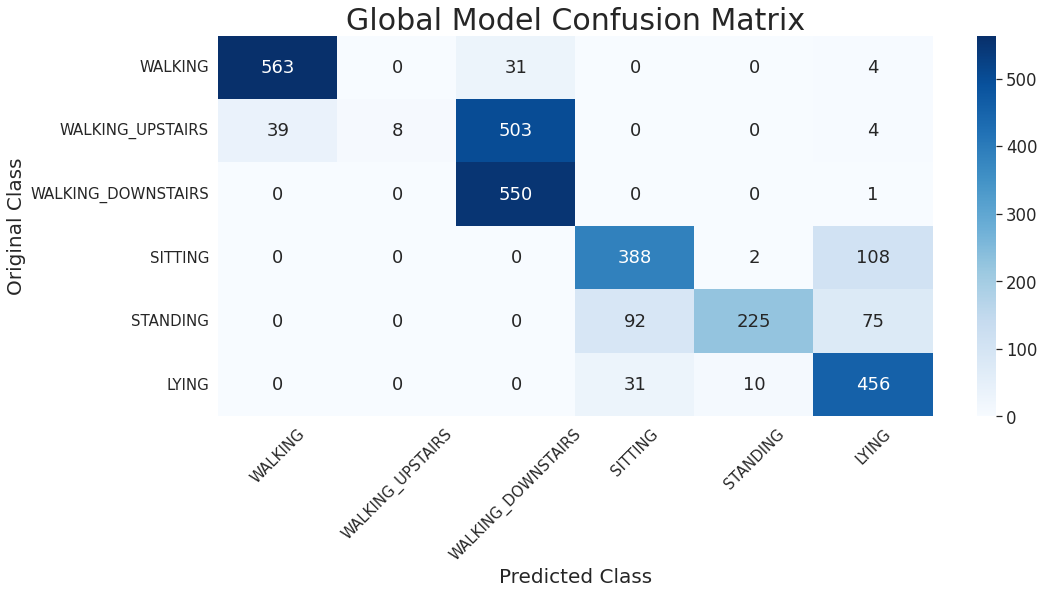

In [24]:
CONFUSION_MATRIX(y_test,y_pred)